<a href="https://colab.research.google.com/github/yugonsan/pytorch_practice/blob/main/%E7%AC%AC2%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- pytorchでは、テンソル（Tensor）という独自のクラスでデータを表します。
- view：NumPyのreshapeと同じでテンソルの階級を変換する関数です
- item：テンソルとしての損失計算から値を取り出すのに使う関数
- max：多値分類で予測結果から予測ラベル値を取得するのに使われる重要な関数

In [1]:
import torch

0階がスカラー、1階がベクトル、2階が行列

In [2]:
# 0階テンソル
r0 = torch.tensor(1.0).float()
# typeを調べる
print(type(r0))
# dtypeを調べる
print(r0.dtype)

<class 'torch.Tensor'>
torch.float32


テンソル変数生成時には、必ずfloat関数の呼び出しをつけて、dtype（テンソル変数の要素のデータ型）を強制的にfloat32に変換するようにする

In [3]:
# shapeを調べる
print(r0.shape)
print(r0.data)

torch.Size([])
tensor(1.)


In [4]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1

In [5]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [6]:
# 1階のテンソル（ベクトル）
# 1階のNumPy変数作成
r1_np = np.array([1, 2, 3, 4, 5])
print(r1_np.shape)
# NumPyからテンソルに変換
r1 = torch.tensor(r1_np).float()
# dtypeを調べる
print(r1.dtype)
# shapeを調べる
print(r1.shape)
# データを調べる
print(r1.data)

(5,)
torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


In [7]:
# 2階テンソル（行列）
# 2階のNumPy変数作成
r2_np = np.array([[1, 5, 6], [4, 3, 2]])
print(r2_np.shape)
# NumPyからテンソルに変換
r2 = torch.tensor(r2_np).float()
print(r2.shape)
print(r2.data)

(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [10]:
# 4階テンソル
# 要素が全て1のテンソル
r4 = torch.ones((2, 3, 3, 2))
print(r4.shape)

torch.Size([2, 3, 3, 2])


In [11]:
# データを調べる
print(r4.data)

tensor([[[[1., 1.],
          [1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.],
          [1., 1.]]]])


In [12]:
#3階テンソル
# 乱数シードの固定
torch.manual_seed(123)
# shape[3, 2, 2]のテンソルを作る
r3 = torch.randn((3, 2, 2))
# shapeを調べる
print(r3.shape)
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [15]:
print(r1.data)
print(r1.dtype)
r5 = r1.long()
print(r5.dtype)
print(r5)

tensor([1., 2., 3., 4., 5.])
torch.float32
torch.int64
tensor([1, 2, 3, 4, 5])


float32のテンソルに.longをつけるint64になります


NumPyのreshapeはNumPyの階数を変換します。Tnesorではview関数です。

In [16]:
print(r3.data)
r6 = r3.view(3, -1)
# shape確認
print(r6.shape)
print(r6.data)

tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])
torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


上の場合だとr3=[3,2,2]=12ですが、3x-1=12より[3,4]に変更される

In [17]:
r7 = r3.view(-1) #-1=12で12個elementのtensor
print(r7.shape)
print(r7.data)

torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


In [18]:
# スカラーテンソルに対しては、item関数で値を取り出せる
item = r0.item()
print(type(item))
print(item)

<class 'float'>
1.0


In [20]:
# 要素が1つだけの場合は1階以上tensorでも可能
t1 = torch.ones(1)
print(t1.shape)
print(t1.item())

torch.Size([1])
1.0


In [21]:
print(r2)
print(r2.max())

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)


In [22]:
# torch.max関数
print(torch.max(r2, 1))

torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))


最大値とどこのインデックスかも教えてくれる

In [24]:
print(torch.max(r2,1)[0])

tensor([6., 4.])


In [25]:
# NumPyへの変換
print(r2.data)
r2_np = r2.data.numpy()
print(type(r2_np))
print(r2_np)

tensor([[1., 5., 6.],
        [4., 3., 2.]])
<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


tensorやと配列前にtensorって書かれる

自動微分機能

In [26]:
# 2次関数の勾配計算
x_np = np.arange(-2, 2.1, 0.25)
print(x_np)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [28]:
# 勾配計算用変数の定義
# requires_grad = True
# numpyからtensorへ
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
print(x)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


In [30]:
y = 2 * x**2 +2 
print(y)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


reruires_gradがある時はmatplotを使えない

<function matplotlib.pyplot.show(*args, **kw)>

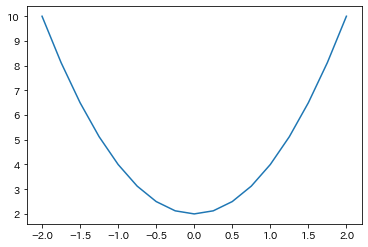

In [31]:
plt.plot(x.data, y.data)
plt.show

In [32]:
z = y.sum()
print(z)

tensor(85., grad_fn=<SumBackward0>)


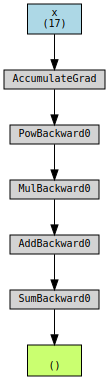

In [33]:
# 計算グラフの可視化
from torchviz import make_dot
# 可視化関数の呼び出し
g = make_dot(z, params={'x': x})
display(g)

In [34]:
# 勾配計算
z.backward()

In [35]:
# 勾配計算が終わると、grad属性に結果が保存される
print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


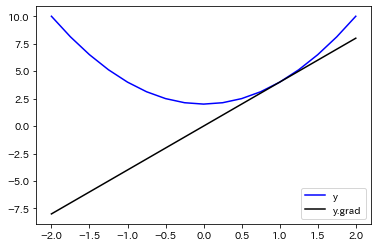

In [36]:
# 元の関数と勾配のグラフ化

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

In [37]:
# 勾配を初期化せず2度目の勾配計算
y = 2 * x **2 + 2
z = y.sum()
z.backward()
print(x.grad)

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])


In [38]:
# 勾配の初期化はzero_関数を使う
x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


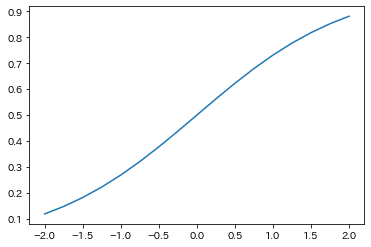

In [48]:
# シグモイド関数の勾配計算
sigmoid = torch.nn.Sigmoid()
y = sigmoid(x)
plt.plot(x.data, y.data)
plt.show()

In [54]:
# 勾配計算はスカラー値である必要があるため、ダミーでsumをかける
z = y.sum()

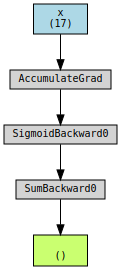

In [55]:
# (3) 計算グラフの可視化
from torchviz import make_dot
g = make_dot(z, params={'x': x})
display(g)

In [56]:
# (4) 勾配計算
z.backward()

# (5) 勾配値の確認
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


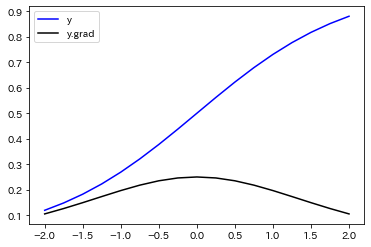

In [57]:
# 元の関数と勾配のグラフ化

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()